In [284]:
import numpy as np
import pandas as pd
import seaborn as sns
from functools import reduce
import pylab as plt
from statannot import add_stat_annotation

from importlib import reload
import itertools
from itertools import count

import sys

# CHANGE PATHS
sys.path.insert(1,'/scratch/c.c21013066/software/ukbb_parser/ukbb_parser')
sys.path.insert(1,'/scratch/c.c21013066/software/ukbb_parser/ukbb_parser/shared_utils')
import ukbb_parser as ukbb_parser
import ukbb_phenotype_dataset as ukbb_phenotype_dataset
sys.path.insert(1,'../../make_figures')
import plots

In [3]:
data_path = '/scratch/c.c21013066/data/ukbiobank'

# Baseline info: verbal interview on drugs

In [2]:
# load drugs
drugs = pd.read_csv(f'{data_path}/phenotypes/AntiParkinsonism.csv')
drugs2 = pd.read_csv(f'{data_path}/phenotypes/Dopa.csv')

drugs = pd.merge(drugs,drugs2,on='eid')

In [41]:
cases = pd.read_csv(f'{data_path}/sample/withGP/noOsteo/ParkinsonDisease.csv')
cases['ParkinsonDisease'] = 1
cases['time_to_diagnosis'] = cases['ParkinsonDisease_age'] - cases['visit_age']

cases2 = pd.read_csv(f'{data_path}/sample/withGP/noOsteo/AllCauseParkinsonism.csv')
cases2['AllCauseParkinsonism'] = 1
cases2['time_to_diagnosis_AllCauseParkinsonism'] = cases2['AllCauseParkinsonism_age'] - cases2['visit_age']

In [4]:
m = pd.merge(cases,drugs,on='eid',how='right')
m.loc[m['ParkinsonDisease']!=1,'ParkinsonDisease'] = 0
m = pd.merge(cases2,m,on='eid',how='right')
m.loc[m['AllCauseParkinsonism']!=1,'AllCauseParkinsonism'] = 0

In [45]:
m.groupby(['AllCauseParkinsonism','ParkinsonDisease'])[['antiparkinsonism','Dopa']].agg(['size','mean','sum'])

antiparkinsonism                   Dopa  \
                                                  size      mean  sum    size   
AllCauseParkinsonism ParkinsonDisease                                           
0.0                  0.0                        498105  0.001548  771  498105   
1.0                  0.0                           471  0.031847   15     471   
                     1.0                          3837  0.217357  834    3837   

                                                      
                                           mean  sum  
AllCauseParkinsonism ParkinsonDisease                 
0.0                  0.0               0.000062   31  
1.0                  0.0               0.004246    2  
                     1.0               0.159500  612

In [31]:
m.groupby('antiparkinsonism')['visit_age','ParkinsonDisease_age','time_to_diagnosis'].agg(['mean','size','std'])

<ipython-input-31-bcfac1aa48b8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m.groupby('antiparkinsonism')['visit_age','ParkinsonDisease_age','time_to_diagnosis'].agg(['mean','size','std'])


visit_age                 ParkinsonDisease_age        \
                       mean  size       std                 mean  size   
antiparkinsonism                                                         
0                 63.347497  3003  5.469997            69.802484  3003   
1                 62.735653   834  5.493329            57.998777   834   

                           time_to_diagnosis                  
                       std              mean  size       std  
antiparkinsonism                                              
0                 7.593545          6.450776  3003  4.816832  
1                 7.748063         -4.736875   834  5.979556

# GP prescription

In [47]:
gp = pd.read_csv(f'{data_path}/record_level/gp_AntiParkinsonism_raw.csv',parse_dates=['issue_date'])
gp['treated'] = 'True'
gp_first = pd.read_csv(f'{data_path}/record_level/gp_AntiParkinsonism_first.csv',parse_dates=['gp_AntiParkinsonism_date'])

/tmp/ipykernel_123823/3499490944.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  gp = pd.read_csv(f'{data_path}/record_level/gp_AntiParkinsonism_raw.csv',parse_dates=['issue_date'])
/tmp/ipykernel_123823/3499490944.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  gp_first = pd.read_csv(f'{data_path}/record_level/gp_AntiParkinsonism_first.csv',parse_dates=['gp_AntiParkinsonism_date'])


In [60]:
m = pd.merge(cases,gp_first,on='eid',how='outer')
m.loc[m['ParkinsonDisease']!=1,'ParkinsonDisease'] = 0
m = pd.merge(cases2,m,on='eid',how='outer',suffixes=['_allcausepd',''])
m.loc[m['AllCauseParkinsonism']!=1,'AllCauseParkinsonism'] = 0

In [61]:
m.groupby(['AllCauseParkinsonism','ParkinsonDisease'])[['gp_AntiParkinsonism']].agg(['size','mean','sum'])

gp_AntiParkinsonism                 
                                                     size      mean    sum
AllCauseParkinsonism ParkinsonDisease                                     
0.0                  0.0                           220004  0.001373  302.0
1.0                  0.0                              263  0.019011    5.0
                     1.0                             3837  0.114955  206.0

In [64]:
(100/cases.shape[0])*206

5.368777690904352

In [66]:
m[m['ParkinsonDisease']==1].groupby('gp_AntiParkinsonism')['visit_age','ParkinsonDisease_age','time_to_diagnosis'].agg(['mean','size','std','min','max'])

/tmp/ipykernel_123823/1559448955.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m[m['ParkinsonDisease']==1].groupby('gp_AntiParkinsonism')['visit_age','ParkinsonDisease_age','time_to_diagnosis'].agg(['mean','size','std','min','max'])


visit_age                                        \
                          mean  size       std        min        max   
gp_AntiParkinsonism                                                    
0.0                  62.975676  1586  5.622892  40.931710  70.542174   
1.0                  62.610936   206  5.341436  47.891469  70.057564   

                    ParkinsonDisease_age                             \
                                    mean  size       std        min   
gp_AntiParkinsonism                                                   
0.0                            66.302958  1586  9.294786   7.819462   
1.0                            64.047293   206  7.883289  42.297925   

                               time_to_diagnosis                             \
                           max              mean  size       std        min   
gp_AntiParkinsonism                                                           
0.0                  82.994175          3.319540  1586  6.889322 -38.056907   
1.0                  78.290451          1.436357   206  5.821971 -20.564420   

                                
                           max  
gp_AntiParkinsonism             
0.0                  13.563591  
1.0                   9.552558

In [68]:
m.groupby(['Dopa','antiparkinsonism','gp_AntiParkinsonism']).size()

KeyError: 'Dopa'

<AxesSubplot:xlabel='issue_date', ylabel='quantity'>

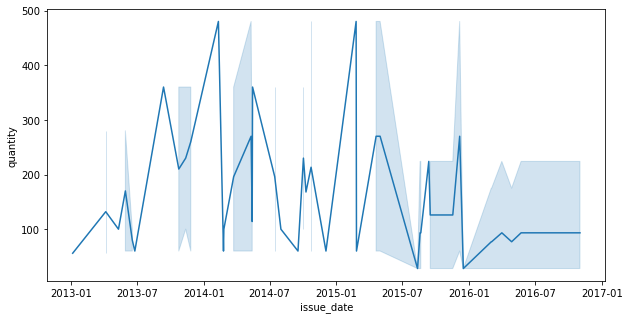

In [17]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x='issue_date',y='quantity',data=gp[gp['eid']==1030610])

# Analysis whether medication has effect on acceleration

In [216]:
# used during accelerometry?
data_raw = pd.read_csv(f'{data_path}/phenotypes/accelerometer/unmatched_all_HCnoOsteo.csv',parse_dates=['date_accelerometry'])
res = pd.read_csv(f'{data_path}/phenotypes/accelerometer/unmatched_all_residual_BMI_HCnoOsteo_intercept.csv')
acc = pd.read_csv(f'{data_path}/phenotypes/demo_acc.csv',parse_dates=['date_accelerometry','date_visit'])
data = pd.merge(data_raw,acc[['eid','date_visit','date_accelerometry']],on='eid',how='outer',suffixes=['_drop',''])
gp = pd.read_csv(f'{data_path}/record_level/gp_AntiParkinsonism_raw.csv',parse_dates=['issue_date'],dayfirst=True)
gp['treated'] = 'True'
data = pd.merge(data,res[['eid','average acceleration residual_bmi']],on='eid',how='left')
# cases = pd.read_csv(f'{data_path}/sample/withGP/noOsteo/ParkinsonDisease.csv')
# cases['ParkinsonDisease'] = 1
# cases['time_to_diagnosis'] = cases['ParkinsonDisease_age'] - cases['visit_age']
# data = pd.merge(data,cases[['eid','ParkinsonDisease']],on='eid',how='left')
data = data.dropna(subset=['date_accelerometry'])

In [219]:
data.groupby(['diagnosis'])['Status'].value_counts()

diagnosis             Status   
AllCauseDementia      Diseased      2000
                      Prodromal      714
AllCauseParkinsonism  Diseased       683
                      Prodromal      476
AlzheimerDisease      Prodromal      344
                      Diseased       131
Depression            Diseased     12155
                      Prodromal       84
Dystonia              Diseased       134
Healthy               Healthy      43753
Osteoarthritis        Diseased     14356
                      Prodromal     1260
ParkinsonDisease      Diseased       630
                      Prodromal      452
Name: Status, dtype: int64

In [266]:
# get closest date to acc_date
data = data.sort_values('date_accelerometry')
gp = gp.sort_values('issue_date')
accm = pd.merge_asof(data,gp,by='eid',left_on='date_accelerometry',right_on='issue_date',tolerance=pd.Timedelta(weeks=10),direction='backward')

accm.loc[accm['treated'].isna(),'treated'] = 'False'

In [267]:
accm['acc_time_since_medication'] = accm['date_accelerometry'] - accm['issue_date']
accm['acc_time_to_medication'] = accm['issue_date'] - accm['date_accelerometry']

accm['acc_time_since_medication_days'] = (accm['date_accelerometry'] - accm['issue_date']) / pd.Timedelta(days=1)
accm['acc_time_to_medication_days'] = (accm['issue_date'] - accm['date_accelerometry']) / pd.Timedelta(days=1)

In [268]:
accm_back = accm.groupby(['diagnosis','eid']).first() # for when direction == backward
#accm_first = accm.groupby(['diagnosis','eid']).first() # for when direction == nearest

In [261]:
accm_back.filter(regex='acc_time').describe()

,acc_time_since_diagnosis,acc_time_to_diagnosis,acc_time_since_medication,acc_time_to_medication,acc_time_since_medication_days,acc_time_to_medication_days
count,66707.000000,66707.000000,56,56,56.000000,56.000000
mean,-0.027415,0.027415,711 days 21:34:17.142857144,-712 days +02:25:42.857142856,711.898810,-711.898810
std,11.319766,11.319766,1473 days 14:33:43.749877984,1473 days 14:33:43.749877984,1473.606756,1473.606756
min,-7.747136,-72.468063,3 days 10:00:00,-5628 days +14:00:00,3.416667,-5627.416667
25%,-6.558884,-4.125798,12 days 04:00:00,-740 days +14:00:00,12.166667,-739.416667
50%,-5.781319,5.781319,24 days 10:00:00,-25 days +14:00:00,24.416667,-24.416667
75%,4.125798,6.558884,739 days 10:00:00,-13 days +20:00:00,739.416667,-12.166667
max,72.468063,7.747136,5627 days 10:00:00,-4 days +14:00:00,5627.416667,-3.416667


In [262]:
difference = np.setdiff1d(accm_first[~accm_first['acc_time_since_medication'].isna()].index,accm_back[~accm_back['acc_time_since_medication'].isna()].index)

In [263]:
accm_first.loc[difference].filter(regex='date'),accm_first.loc[difference].groupby('diagnosis')[['acc_time_to_medication_days']].agg(['size','count','mean','min','max','std'])

(                             date_accelerometry_drop date_visit  \
 diagnosis            eid                                          
 AllCauseDementia     4051798     2014-05-29 10:00:00 2007-11-27   
 AllCauseParkinsonism 1234565     2015-05-14 10:00:00 2007-11-13   
                      1283671     2014-06-09 10:00:00 2008-05-06   
                      1401399     2013-10-21 10:00:00 2010-05-28   
                      2515100     2013-12-02 10:00:00 2007-12-05   
                      2596024     2013-12-07 10:00:00 2007-12-04   
                      2721196     2013-06-15 10:00:00 2008-04-16   
                      4051798     2014-05-29 10:00:00 2007-11-27   
 Depression           5308371     2013-06-29 10:00:00 2008-05-31   
 Osteoarthritis       1401399     2013-10-21 10:00:00 2010-05-28   
                      3818993     2014-09-08 10:00:00 2008-02-15   
                      5091955     2013-10-16 10:00:00 2007-12-20   
                      5308371     2013-06-29 10:

In [272]:
accm
accm_back.groupby(['diagnosis','Status'])[['acc_time_since_medication_days']].agg(['size','count','mean','std'])

acc_time_since_medication_days        \
                                                         size count   
diagnosis            Status                                           
AllCauseDementia     Diseased                             986     0   
                     Prodromal                            383     2   
AllCauseParkinsonism Diseased                             308    13   
                     Prodromal                            211     0   
AlzheimerDisease     Diseased                              59     0   
                     Prodromal                            153     1   
Depression           Diseased                            9514     7   
                     Prodromal                             72     0   
Dystonia             Diseased                              81     1   
Healthy              Healthy                            43753     0   
Osteoarthritis       Diseased                           12305     3   
                     Prodromal                           1102     0   
ParkinsonDisease     Diseased                             273    13   
                     Prodromal                            196     0   

                                                      
                                     mean        std  
diagnosis            Status                           
AllCauseDementia     Diseased         NaN        NaN  
                     Prodromal  14.916667  13.435029  
AllCauseParkinsonism Diseased   15.570513   9.847556  
                     Prodromal        NaN        NaN  
AlzheimerDisease     Diseased         NaN        NaN  
                     Prodromal  24.416667        NaN  
Depression           Diseased   26.416667  14.877276  
                     Prodromal        NaN        NaN  
Dystonia             Diseased    4.416667        NaN  
Healthy              Healthy          NaN        NaN  
Osteoarthritis       Diseased   25.750000  15.534907  
                     Prodromal        NaN        NaN  
ParkinsonDisease     Diseased   15.570513   9.847556  
                     Prodromal        NaN        NaN

Text(0, 0.5, 'average acceleration')

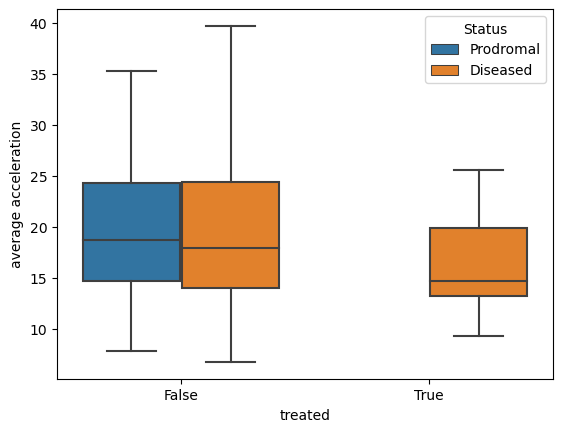

In [274]:
ax = sns.boxplot(hue='Status',x='treated',y='No_wear_time_bias_adjusted_average_acceleration',data=accm_back.loc['ParkinsonDisease'],showfliers=False)
ax.set_ylabel('average acceleration')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

False v.s. True: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.944e-01 U_stat=2.051e+03
False    260
True      13
Name: treated, dtype: int64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

False v.s. True: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.944e-01 U_stat=2.051e+03
False    219
True      10
Name: treated, dtype: int64


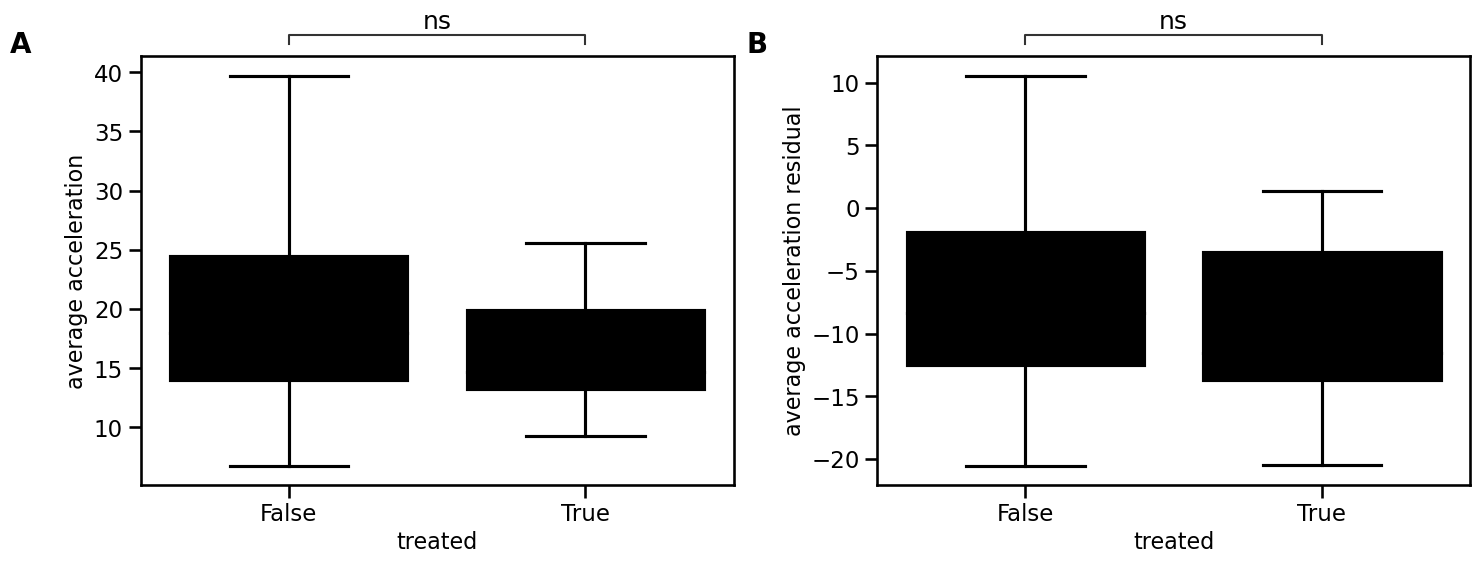

In [289]:
fig,axes = plt.subplots(ncols=2,figsize=(15,6))
plots.plot_context()
ax0 = sns.boxplot(x='treated',y='No_wear_time_bias_adjusted_average_acceleration',data=accm_back[accm_back['Status']=='Diseased'].loc['ParkinsonDisease'],showfliers=False,color='k',ax=axes[0])
test_results = add_stat_annotation(ax0, data=accm_back[accm_back['Status']=='Diseased'].loc['ParkinsonDisease'], x='treated', y='No_wear_time_bias_adjusted_average_acceleration',
                                   test='Mann-Whitney', text_format='star',box_pairs = [("True",'False')],
                                   loc='outside', verbose=2)
ax0.set_ylabel('average acceleration')
ax0.text(-0.22, 1.01,'A', transform=ax0.transAxes,size=20, weight='bold')
print(accm_back[accm_back['Status']=='Diseased'].loc['ParkinsonDisease'].dropna(subset='No_wear_time_bias_adjusted_average_acceleration')['treated'].value_counts())

ax1 = sns.boxplot(x='treated',y='average acceleration residual_bmi',data=accm_back[accm_back['Status']=='Diseased'].loc['ParkinsonDisease'],showfliers=False,color='k',ax=axes[1])
test_results = add_stat_annotation(ax1, data=accm_back[accm_back['Status']=='Diseased'].loc['ParkinsonDisease'], x='treated', y='No_wear_time_bias_adjusted_average_acceleration',
                                   test='Mann-Whitney', text_format='star',box_pairs = [("True",'False')],
                                   loc='outside', verbose=2)
ax1.set_ylabel('average acceleration residual')
ax1.text(-0.22, 1.01,'B', transform=ax1.transAxes,size=20, weight='bold')
print(accm_back[accm_back['Status']=='Diseased'].loc['ParkinsonDisease'].dropna(subset='average acceleration residual_bmi')['treated'].value_counts())
plt.tight_layout()
plt.savefig('/scratch/c.c21013066/images/paper/ProdromalUKBB/medication_acceleration.png',dpi=300,bbox_inches='tight')
plt.savefig('/scratch/c.c21013066/images/paper/ProdromalUKBB/medication_acceleration.pdf',dpi=300,bbox_inches='tight')